## FM层

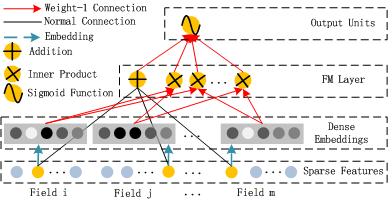

首先讲一下为什么这个网络结构的结果是FM的结果  
对于经典的FM，其公式是
$$y = \sum_{i=1}^{n}w_ix_i+\sum_{i=1}^{n}\sum_{j=i+1}^{n}<v_i,v_j>x_ix_j\tag{1}$$  
在deepFM中，通过FM来实现 embedding层，这里每个Field是类别特征onehot之后的结果

例如一个类别特征是$\left[\begin{matrix} 1 \\ 3 \\ 0 \end{matrix}\right]$,它的onehot编码结果为$\left[\begin{matrix} 0&1&0&0 \\ 0&0&0&1 \\ 1&0&0&0 \end{matrix}\right]$


In [26]:
from mxnet import nd
X = nd.array([[1],[3],[0]])
X_onehot = nd.one_hot(X[:,0],depth = int(nd.max(X[:,0]).asscalar()+1))
X_onehot


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

现在来看$field_i$ 和$filed_j$在这里的计算情况，假设$fild_j$有$f_i$维，$field_j$有$f_j$维，那么可以设$feild_i$的数据为$X_{n \times field_j}$,$feild_i$的数据为$X_{n \times field_j}$,要将$X_{n \times field_j}$映射为$k$的隐dense向量，可以$X_{n \times field_i}V_{field_i \times k}$。
$$
V_{field_i \times k} = 
\left[\begin{matrix}v_{11} & v_{12} & \cdots & v_{1k} \\
v_{21} & v_{22} & \cdots & v_{2k}\\
\cdots & \cdots & \cdots & \cdots\\
v_{{field_i}1} & v_{{field_i}2} & \cdots & v_{{field_i}k}
\end{matrix}
\right]
$$  
对于数据$
\left[\begin{matrix}x_{11} & x_{12} & \cdots & x_{1{field_i}} \\
\end{matrix}
\right]$,它除了某一项$x_1m=1$以外，别的项$x_{1k_{(k \ne m)}}=0$，当它和$V$点乘时有
$$
x_1V = 
\left[\begin{matrix}x_{11} & x_{12} & \cdots & x_{1{field_i}} \\
\end{matrix}
\right]
\left[\begin{matrix}v_{11} & v_{12} & \cdots & v_{1k} \\
v_{21} & v_{22} & \cdots & v_{2k}\\
\cdots & \cdots & \cdots & \cdots\\
v_{{field_i}1} & v_{{field_i}2} & \cdots & v_{{field_i}k}
\end{matrix}
\right]
=
\left[\begin{matrix}v_{m1} & v_{m2} & \cdots & v_{mk} \\
\end{matrix}
\right] x_{1m}
=v_i x_{1m}
$$
同理，对于$field_j$有，假设$x_1n=1$
$$
x_1V = 
\left[\begin{matrix}x_{11} & x_{12} & \cdots & x_{1{field_j}} \\
\end{matrix}
\right]
\left[\begin{matrix}v_{11} & v_{12} & \cdots & v_{1k} \\
v_{21} & v_{22} & \cdots & v_{2k}\\
\cdots & \cdots & \cdots & \cdots\\
v_{{field_j}1} & v_{{field_j}2} & \cdots & v_{{field_j}k}
\end{matrix}
\right]
=
\left[\begin{matrix}v_{n1} & v_{n2} & \cdots & v_{nk} \\
\end{matrix} 
\right] x_{1n}
= v_j x_{1n} 
$$
也就是这两个$field$的dense embedding的结果为
$$
dense_i = 
\left[\begin{matrix}v_{m1} & v_{m2} & \cdots & v_{mk} \\
\end{matrix}
\right] x_{1m}
=v_i x_{1m}
$$
$$
dense_j =
\left[\begin{matrix}v_{n1} & v_{n2} & \cdots & v_{nk} \\
\end{matrix}
\right] x_{1n}
= v_j x_{1n}
$$
在FM Layer里，这些dense embeddings的结果做inner product，也就是$dense_i$和$dense_j$做向量内积。
$$dense_i dense_j = <v_i,v_j>x_{1m}x_{1n}
$$
这正是$\tag{1}$中的二阶项，而对于$i \ne m$和$j \ne n$，有$x_i=0,x_j=0$，二阶项为0。  
### 可以看到这里的dense embeddings的结果也就是FM模型中的隐向量